# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

#Done

### Generate the Cities List by Using the `citipy` Library

In [ ]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

#Done + ~matches

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [ ]:
#Working Model ___________________________________________

# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data

#alterted code to be able to integrate other provided code easier. 
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
    # Create endpoint URL with each city
    city_url = url + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
        #adding message for successful capture
        print("City Found + Captured!<<<<<<<<<<<<<<<<<<<<<")

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

#Done + ~matches

In [ ]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

# Show Record Count
print(city_data_df.count())

#Done + ~matches

In [ ]:
# Display sample data
city_data_df.head()

#Done + ~matches

In [ ]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

#Done

In [2]:
# Read saved data
city_data_df =[]
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

#Done + ~matches

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bara,10.3744,10.7288,25.92,20,6,3.39,NG,1681349296
1,bengkulu,-3.8004,102.2655,25.23,82,54,1.59,ID,1681349296
2,paamiut,61.9940,-49.6678,0.12,72,74,2.27,GL,1681348815
3,rikitea,-23.1203,-134.9692,25.28,68,48,4.87,PF,1681348764
4,cidreira,-30.1811,-50.2056,23.27,79,11,3.12,BR,1681349297


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

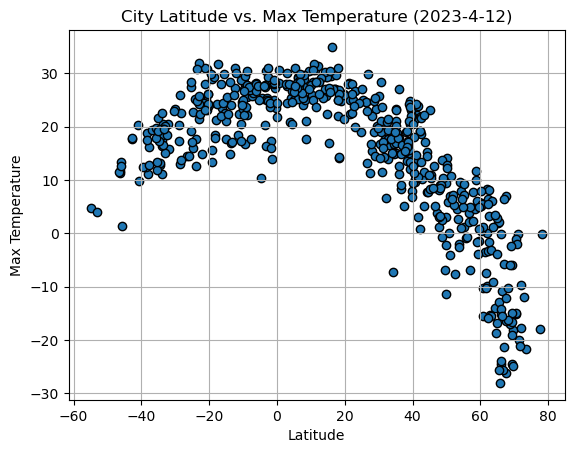

<Figure size 640x480 with 0 Axes>

In [3]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values,y_values, marker="o", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("City Latitude vs. Max Temperature (2023-4-12)")
plt.grid(True)
plt.show()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

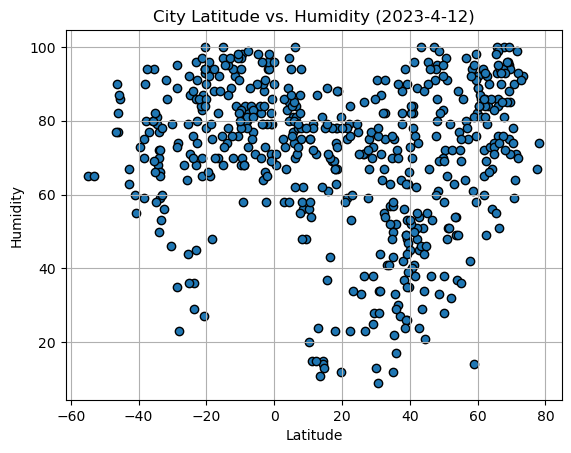

<Figure size 640x480 with 0 Axes>

In [4]:
# Build the scatter plots for latitude vs. humidity
y_values = city_data_df["Humidity"]
plt.scatter(x_values,y_values, marker="o", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs. Humidity (2023-4-12)")
plt.grid(True)
plt.show()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

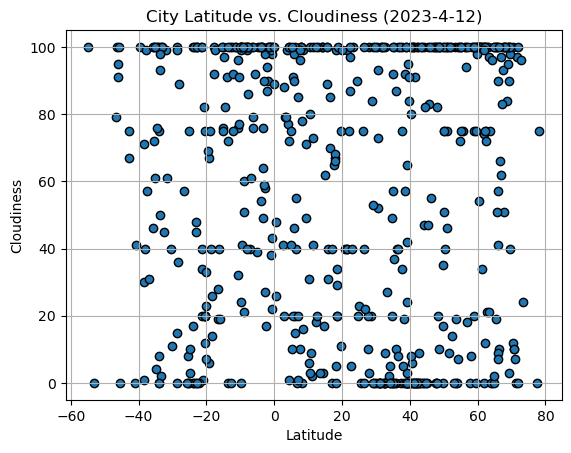

<Figure size 640x480 with 0 Axes>

In [5]:
# Build the scatter plots for latitude vs. cloudiness
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values,y_values, marker="o", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude vs. Cloudiness (2023-4-12)")
plt.grid(True)
plt.show()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

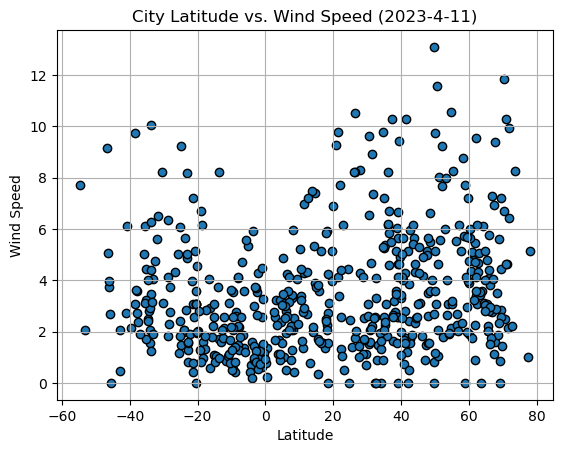

<Figure size 640x480 with 0 Axes>

In [6]:
# Build the scatter plots for latitude vs. wind speed
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values,y_values, marker="o", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude vs. Wind Speed (2023-4-11)")
plt.grid(True)
plt.show()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [7]:
# Define a function to create Linear Regression plots

In [8]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
lat_column = city_data_df["Lat"]
northern_hemi_df=city_data_df.loc[(lat_column >= 0)]
northern_hemi_df = northern_hemi_df.sort_values("Lat", ascending=True)
northern_hemi_df=northern_hemi_df.reset_index(drop=True)
# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mbandaka,0.0487,18.2603,21.72,90,89,0.79,CD,1681349353
1,thinadhoo,0.5333,72.9333,28.17,71,26,1.36,MV,1681349326
2,gorontalo,0.5412,123.0595,30.64,68,48,0.24,ID,1681349400
3,kudahuvadhoo,2.6708,72.8944,27.94,75,41,2.77,MV,1681349398
4,boa vista,2.8197,-60.6733,29.99,58,20,2.57,BR,1681349347


In [9]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[(lat_column < 0)]
southern_hemi_df = southern_hemi_df.sort_values("Lat", ascending=False)
southern_hemi_df=southern_hemi_df.reset_index(drop=True)

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sao gabriel da cachoeira,-0.1303,-67.0892,24.34,96,100,0.92,BR,1681349462
1,santa isabel do rio negro,-0.4139,-65.0192,23.57,96,100,1.15,BR,1681349354
2,hithadhoo,-0.6000,73.0833,28.24,69,22,1.50,MV,1681349339
3,port-gentil,-0.7193,8.7815,27.30,79,98,3.28,GA,1681348786
4,puerto ayora,-0.7393,-90.3518,28.08,86,43,1.34,EC,1681349324


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7607183081380839


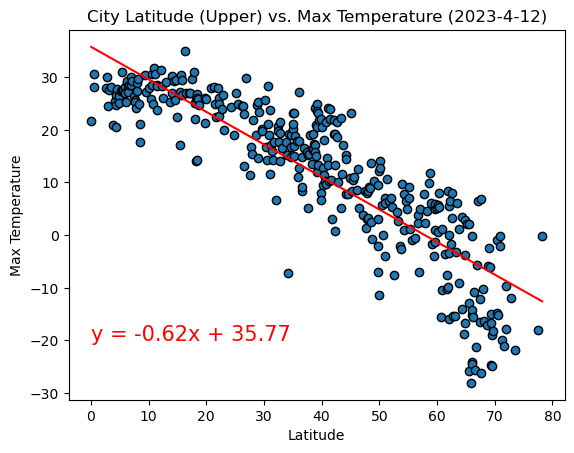

In [10]:
# Linear regression on Northern Hemisphere
x_values_b = northern_hemi_df["Lat"]
y_values_b = northern_hemi_df["Max Temp"]
(slope, intercept, r_value, _, _) = linregress(x_values_b, y_values_b)
regress_v = x_values_b * slope + intercept
plt.scatter(x_values_b,y_values_b, marker="o", edgecolors="black")
plt.plot(x_values_b,regress_v,"red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("City Latitude (Upper) vs. Max Temperature (2023-4-12)")
line_funct = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_funct,(0,-20),fontsize=15,color="red")
print(f"The r-value is: {r_value**2}")

# Show plot for northern lat vs max temp
plt.show()

The r-value is: 0.4061173495773122


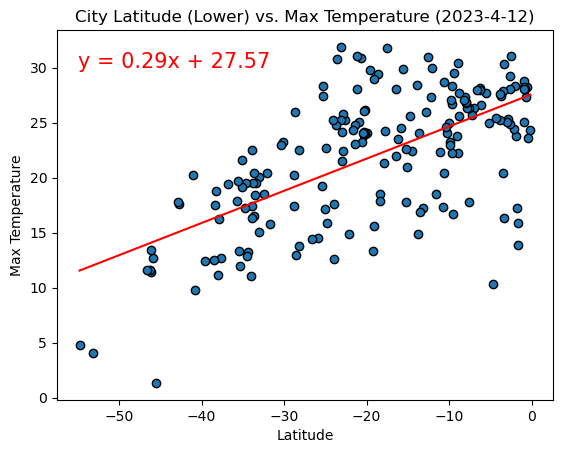

In [11]:
# Linear regression on Southern Hemisphere
x_values_b = southern_hemi_df["Lat"]
y_values_b = southern_hemi_df["Max Temp"]
(slope, intercept, r_value, _, _) = linregress(x_values_b, y_values_b)
regress_v = x_values_b * slope + intercept
plt.scatter(x_values_b,y_values_b, marker="o", edgecolors="black")
plt.plot(x_values_b,regress_v,"red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("City Latitude (Lower) vs. Max Temperature (2023-4-12)")
line_funct = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_funct,(-55,30),fontsize=15,color="red")
print(f"The r-value is: {r_value**2}")

# Show plot for southern lat vs max temp
plt.show()

**Discussion about the linear relationship:** Northern + Southern plots look to have intersecting / divering relationship. Each have fairly dense plotting patterns. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.04341723940545797


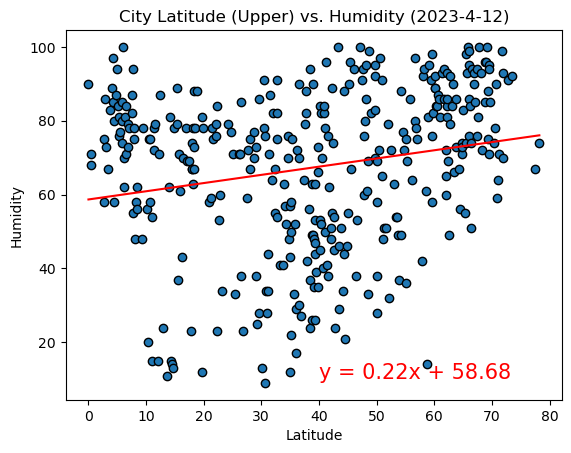

In [12]:
# Northern Hemisphere
x_values_b = northern_hemi_df["Lat"]
y_values_b = northern_hemi_df["Humidity"]
(slope, intercept, r_value, _, _) = linregress(x_values_b, y_values_b)
regress_v = x_values_b * slope + intercept
plt.scatter(x_values_b,y_values_b, marker="o", edgecolors="black")
plt.plot(x_values_b,regress_v,"red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude (Upper) vs. Humidity (2023-4-12)")
line_funct = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_funct,(40,10),fontsize=15,color="red")
print(f"The r-value is: {r_value**2}")

# Show plot for northern lat vs humidity
plt.show()

The r-value is: 0.07469465695513093


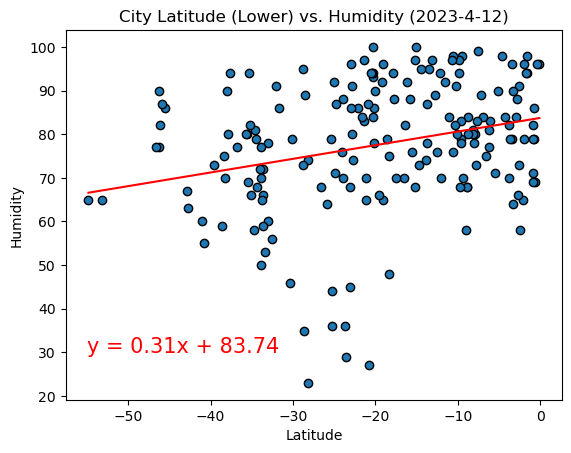

In [13]:
# Southern Hemisphere
x_values_b = southern_hemi_df["Lat"]
y_values_b = southern_hemi_df["Humidity"]
(slope, intercept, r_value, _, _) = linregress(x_values_b, y_values_b)
regress_v = x_values_b * slope + intercept
plt.scatter(x_values_b,y_values_b, marker="o", edgecolors="black")
plt.plot(x_values_b,regress_v,"red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude (Lower) vs. Humidity (2023-4-12)")
line_funct = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_funct,(-55,30),fontsize=15,color="red")
print(f"The r-value is: {r_value**2}")

# Show plot for southern lat vs humidity
plt.show()

**Discussion about the linear relationship:** Northern + Southern plots looks similar, w/ ~parallel relationship (most data too inconsistant) 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.008923968658608034


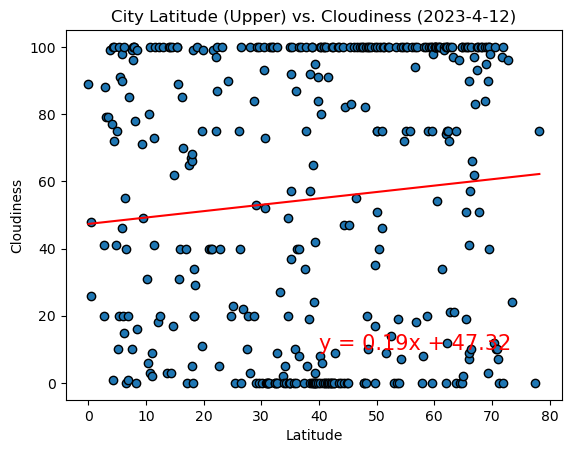

In [14]:
# Northern Hemisphere
x_values_b = northern_hemi_df["Lat"]
y_values_b = northern_hemi_df["Cloudiness"]
(slope, intercept, r_value, _, _) = linregress(x_values_b, y_values_b)
regress_v = x_values_b * slope + intercept
plt.scatter(x_values_b,y_values_b, marker="o", edgecolors="black")
plt.plot(x_values_b,regress_v,"red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude (Upper) vs. Cloudiness (2023-4-12)")
line_funct = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_funct,(40,10),fontsize=15,color="red")
print(f"The r-value is: {r_value**2}")

# Show plot for northern lat vs cloudiness
plt.show()

The r-value is: 0.043148502194808445


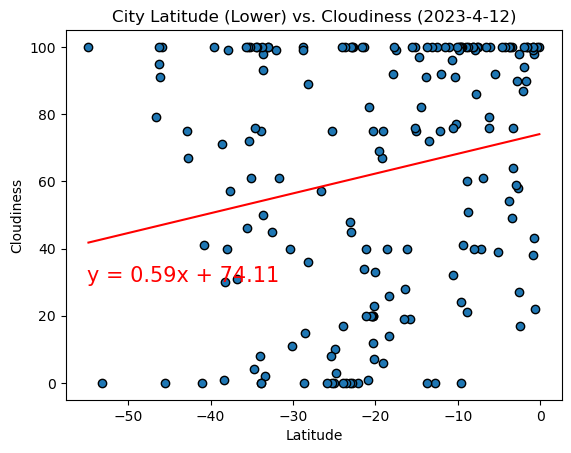

In [15]:
# Southern Hemisphere
x_values_b = southern_hemi_df["Lat"]
y_values_b = southern_hemi_df["Cloudiness"]
(slope, intercept, r_value, _, _) = linregress(x_values_b, y_values_b)
regress_v = x_values_b * slope + intercept
plt.scatter(x_values_b,y_values_b, marker="o", edgecolors="black")
plt.plot(x_values_b,regress_v,"red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Latitude (Lower) vs. Cloudiness (2023-4-12)")
line_funct = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_funct,(-55,30),fontsize=15,color="red")
print(f"The r-value is: {r_value**2}")

# Show plot for southern lat vs cloudiness
plt.show()

**Discussion about the linear relationship:** Northern + Southern plots looks similar, w/ ~parallel relationship. Looks like there could be trends accross the extreme values of Cloudiness. Further seperation would be needed to determine how/ why they're plotted this way. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.03822324388612694


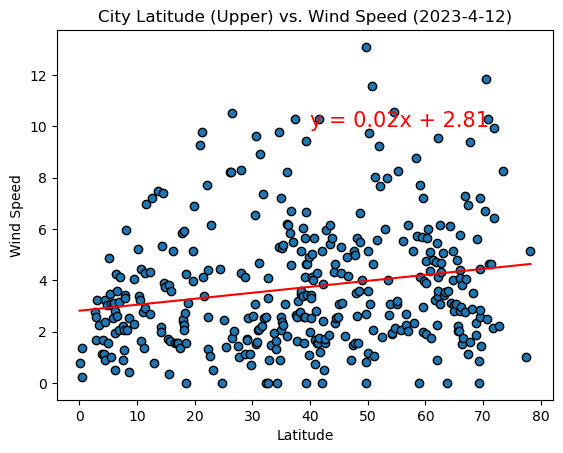

In [16]:
# Northern Hemisphere
x_values_b = northern_hemi_df["Lat"]
y_values_b = northern_hemi_df["Wind Speed"]
(slope, intercept, r_value, _, _) = linregress(x_values_b, y_values_b)
regress_v = x_values_b * slope + intercept
plt.scatter(x_values_b,y_values_b, marker="o", edgecolors="black")
plt.plot(x_values_b,regress_v,"red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude (Upper) vs. Wind Speed (2023-4-12)")
line_funct = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_funct,(40,10),fontsize=15,color="red")
print(f"The r-value is: {r_value**2}")

# Show plot for northern lat vs wind
plt.show()

The r-value is: 0.12595847557174647


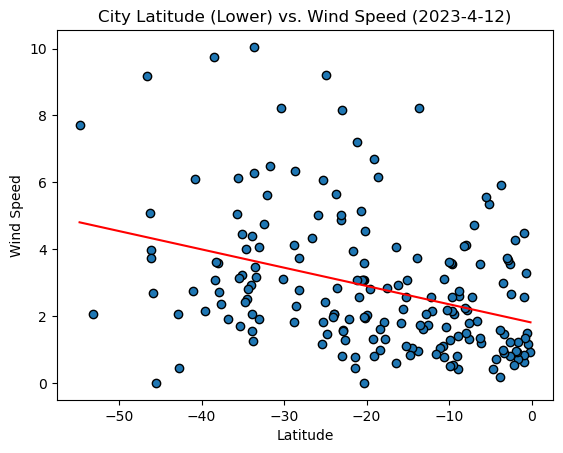

In [17]:
# Southern Hemisphere  
x_values_b = southern_hemi_df["Lat"]
y_values_b = southern_hemi_df["Wind Speed"]
(slope, intercept, r_value, _, _) = linregress(x_values_b, y_values_b)
regress_v = x_values_b * slope + intercept
plt.scatter(x_values_b,y_values_b, marker="o", edgecolors="black")
plt.plot(x_values_b,regress_v,"red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Latitude (Lower) vs. Wind Speed (2023-4-12)")
line_funct = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_funct,(-55,30),fontsize=15,color="red")
print(f"The r-value is: {r_value**2}")

# Show plot for southern lat vs wind
plt.show()

**Discussion about the linear relationship:** Northern + Southern plots look to have intersecting / divering relationship. Each have fairly loose plotting patterns. 

In [ ]:
# Insert_Response_Here